In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [51]:
df=pd.read_csv("heartdisease.csv")

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
#checking whether there are any null values in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [54]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [55]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [56]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


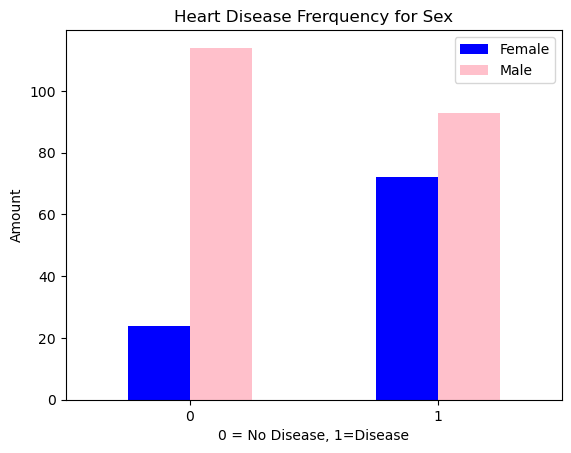

In [57]:
pd.crosstab(df.target, df.sex).plot(kind="bar",color=["blue","pink"])
plt.title("Heart Disease Frerquency for Sex")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

### Heart Disease Frequency according to age

In [58]:
df.age.value_counts().shape

(41,)

In [63]:
pd.crosstab(df.age,df.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


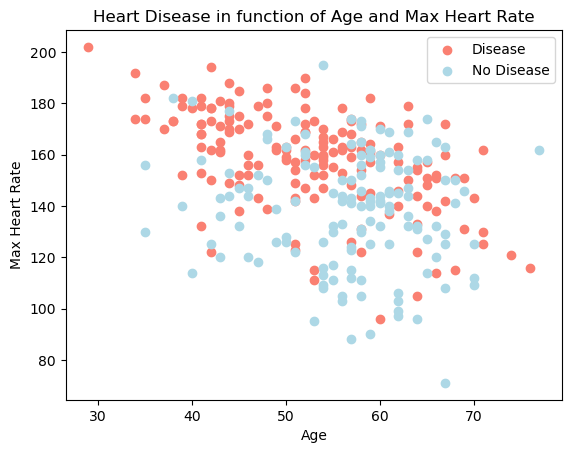

In [64]:
#Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

#Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

### Heart Disease Frequency per Chest Pain Type¶

In [66]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


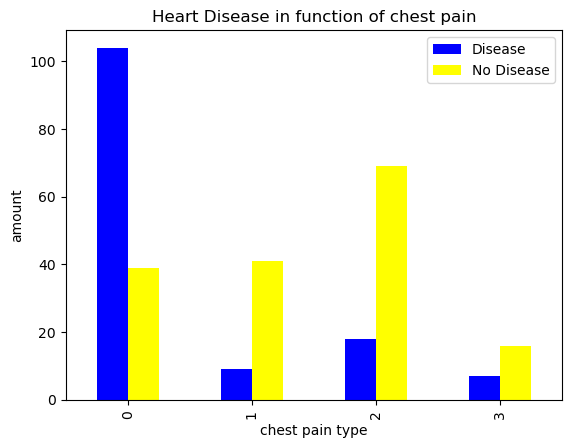

In [68]:
pd.crosstab(df.cp,df.target).plot(kind='bar',color=["blue","yellow"])
plt.title("Heart Disease in function of chest pain")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["Disease","No Disease"])

In [69]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [70]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [71]:
x=df.iloc[:,:-1]
y=df['target']
y=pd.DataFrame(y)

In [72]:
x,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=9)

In [75]:
model=LogisticRegression()

In [76]:
model.fit(x_train,y_train)

LogisticRegression()

In [77]:
y_pred=model.predict(x_test)

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [79]:
accuracy_score(y_test,y_pred)*100

84.61538461538461

In [46]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        36
           1       0.86      0.89      0.88        55

    accuracy                           0.85        91
   macro avg       0.84      0.83      0.84        91
weighted avg       0.85      0.85      0.85        91

[[28  8]
 [ 6 49]]



## training with the other models

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [81]:
models = {"Linear Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Decision Tree": DecisionTreeClassifier(),}
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        #fit model
        model.fit(x_train, y_train)
        model_scores[name]=model.score(x_test, y_test)
    return model_scores

In [82]:
model_scores = fit_and_score(models=models, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_scores

{'Linear Regression': 0.8461538461538461,
 'KNN': 0.6703296703296703,
 'Random Forest': 0.8241758241758241,
 'Decision Tree': 0.7142857142857143}

### Hyperparameter tuning with the RandomizedSearchCV for Logistic Regression

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [92]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}
lr_classifier = LogisticRegression(max_iter=1000)
# Initializing GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=lr_classifier, param_grid=param_grid, cv=3)

In [95]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [96]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.615848211066026, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8302481556002683


In [98]:
y_pred = grid_search.predict(x_test)

In [101]:
accuracy_score(y_pred,y_test)*100

84.61538461538461

### Hyperparameter tuning with the RandomizedSearchCV for randomforest

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
n_estimators=[int(x) for x in np.linspace(20,2000,10)]
max_features = ['auto', 'sqrt','log2']
max_depth=[int(x) for x in np.linspace(10,1000,10)]
min_samples_split=[2,4,6,8,10,14]
min_samples_leaf=[3,6,7,8,9,12]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [20, 240, 460, 680, 900, 1120, 1340, 1560, 1780, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 4, 6, 8, 10, 14], 'min_samples_leaf': [3, 6, 7, 8, 9, 12], 'criterion': ['entropy', 'gini']}


In [85]:
rf=RandomForestClassifier()
rsv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)
### fit the randomized model
rsv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [3, 6, 7, 8, 9, 12],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              14],
                                        'n_estimators': [20, 240, 460, 680, 900,
                                                         1120, 1340, 1560, 1780,
                                                         2000]},
                   random_state=42, verbose=2)

In [86]:
rsv.best_params_

{'n_estimators': 680,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 340,
 'criterion': 'gini'}

In [87]:
rsv.best_estimator_

RandomForestClassifier(max_depth=340, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=680)

In [88]:
r1=rsv.best_estimator_

In [102]:
from sklearn.metrics import accuracy_score
pred=r1.predict(x_test)
print(confusion_matrix(y_test,pred))
print("Accuracy Score {}".format(accuracy_score(y_test,pred)*100))
print("Classification report: {}".format(classification_report(y_test,pred)))

[[27  9]
 [ 7 48]]
Accuracy Score 82.41758241758241
Classification report:               precision    recall  f1-score   support

           0       0.79      0.75      0.77        36
           1       0.84      0.87      0.86        55

    accuracy                           0.82        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.82      0.82        91



<AxesSubplot:ylabel='Count'>

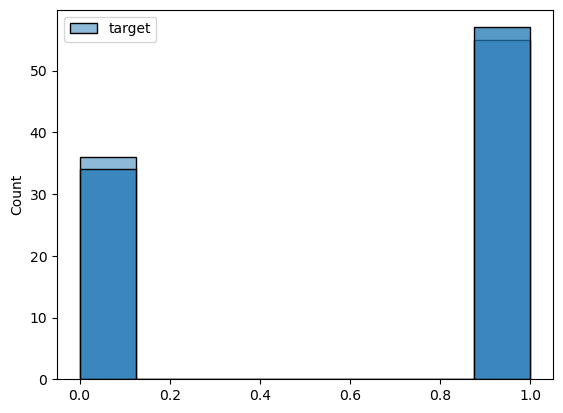

In [103]:
sns.histplot(y_test)
sns.histplot(y_pred)